In [29]:
# ESAME FINALE 
import pandas as pd
url = "https://raw.githubusercontent.com/owid/covid-19-data/refs/heads/master/public/data/owid-covid-data.csv "
df = pd.read_csv(url)
df.head(5)
# visualizzazione delle prime 5 righe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [30]:
# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati
df.shape
# dimensione: nel dataset ci sono 429435 osservazioni e 67 variabili (colonne)

(429435, 67)

In [4]:
df.info()
# 5 variabili sono di tipo object (stringhe), 61 variabili di tipo float64 (numeri decimali) e 1 è di tipo int64 (numerico intero)
# alcune variabili presentano dei valori nulli, come quelle legate a ospedalizzazioni, test e vaccinazioni.
# la memoria occupata è pari a 219.5 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [31]:
# elenco delle colonne - in questo caso è essenziale perché le colonne sono tante e nell'anteprima delle 5 righe non si riescono a visualizzare tutte.
df.columns 

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [50]:
# alcune statistiche preliminare
# continent/location
# total_cases/new_cases

# per continent
print("i valori unici di 'continent' sono:", df['continent'].unique())
print("i valori nulli invece:", df['continent'].isna().sum())
print("n. di record per", df['continent'].value_counts(dropna=False))

# per location
print("le prime 20 location:", df['location'].unique()[:20])
print("n. totale di location:", df['location'].nunique())

# eventuali location senza contienti
print("location senza continent:", df[df['continent'].isna()]['location'].unique())

# analisi sui casi
print("nuovi casi:", df['new_cases'].describe())
print("Casi totali:", df['total_cases'].describe())

# Alcune righe per capire la logica di new_cases e total_cases
print("anteprima:")
print(df[['location','continent','new_cases','total_cases']].head(20))


# possiamo concludere che:
# la variabile location contiene sia paesi singoli che regioni e aggregati, come i continenti
# la variabile continent ha informazioni circa i 6 continenti ed è NULL se a sua volta location è un aggregato (regione/continente)
# infatti, ci sono 26525 null in continent che corrispondono a questa situazione.
# la variabile total case è cumulativa e cresce nel tempo
# la variabile new_case non è cumulativa, ma si riferisce ai nuovi casi registrati giornalieri o settimanali.

i valori unici di 'continent' sono: ['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'South America']
i valori nulli invece: 26525
n. di record per continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
NaN              26525
South America    23440
Name: count, dtype: int64
le prime 20 location: ['Afghanistan' 'Africa' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Asia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados']
n. totale di location: 255
location senza continent: ['Africa' 'Asia' 'Europe' 'European Union (27)' 'High-income countries'
 'Low-income countries' 'Lower-middle-income countries' 'North America'
 'Oceania' 'South America' 'Upper-middle-income countries' 'World']
nuovi casi: count    4.101590e+05
mean     8.017360e+03
std      2.296649e+05
min      0.000000e+00
25%      0.000000e+00
50%   

In [ ]:
# 2. Si chiede di trovare, per ogni continente:
# a. il numero di casi fin dall'inizio della pandemia;

In [33]:
df['date'].dtype
# la variabile 'date' è una stringa e deve essere convertita in formato data.

dtype('O')

In [38]:
# conversione 
df['date'] = pd.to_datetime(df['date'])

In [39]:
df['date'].dtype
# verifica

dtype('<M8[ns]')

In [35]:
# ecco un altro modo per avere un'analisi grafica.
df[df["continent"].isna()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1674,OWID_AFR,NaN,Africa,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1675,OWID_AFR,NaN,Africa,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1676,OWID_AFR,NaN,Africa,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1677,OWID_AFR,NaN,Africa,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
1678,OWID_AFR,NaN,Africa,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1426736614,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424408,OWID_WRL,NaN,World,2024-08-10,NaN,NaN,NaN,NaN,NaN,NaN,...,34.64,60.13,2.7,72.58,0.74,7975105024,NaN,NaN,NaN,NaN
424409,OWID_WRL,NaN,World,2024-08-11,NaN,NaN,NaN,NaN,NaN,NaN,...,34.64,60.13,2.7,72.58,0.74,7975105024,NaN,NaN,NaN,NaN
424410,OWID_WRL,NaN,World,2024-08-12,NaN,NaN,NaN,NaN,NaN,NaN,...,34.64,60.13,2.7,72.58,0.74,7975105024,NaN,NaN,NaN,NaN
424411,OWID_WRL,NaN,World,2024-08-13,NaN,NaN,NaN,NaN,NaN,NaN,...,34.64,60.13,2.7,72.58,0.74,7975105024,NaN,NaN,NaN,NaN


In [36]:
df_cont = df.dropna(subset=["continent"])
# eliminiamo le righe che presentano i NULL perché altrimenti si creerebbero dei duplicati/ripetizioni
casi = df_cont.sort_values("date").groupby("continent")["total_cases"].last()
print(casi)

continent
Africa            1153361.0
Asia              5309410.0
Europe            4457868.0
North America        1403.0
Oceania                 4.0
South America    10101218.0
Name: total_cases, dtype: float64


In [37]:
# b. la percentuale rispetto al mondiale mondiale del numero di casi 
mondiale = casi.sum()                 # ci serve il totale che andrà al denominatore 
percentuale = (casi/mondiale) * 100   # percentuale per ogni continenete
risultato = casi.reset_index()        # trasformazione della series, in modo che l'indice (continent) sia in una colonna vera e propria
risultato['percentuale_mondiale'] = percentuale.values
print(risultato)

       continent  total_cases  percentuale_mondiale
0         Africa    1153361.0              5.486118
1           Asia    5309410.0             25.254927
2         Europe    4457868.0             21.204452
3  North America       1403.0              0.006674
4        Oceania          4.0              0.000019
5  South America   10101218.0             48.047810


In [43]:
# 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente, 
# filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati: 
# a. l'evoluzione del casi totali dall'inizio alla fine dell'anno

# la variabile date è già stata trasformata in formate data

# consideriamo solo l'italia come paese e l'anno 2022 - location in questo caso è giusta come variabili perché contiene i singoli paesi, come l'Italia.
filtro = df[(df['location'] == 'Italy') & (df['date'].dt.year == 2022)]
print(filtro)

       iso_code continent location       date  total_cases  new_cases  \
186002      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
186003      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
186004      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
186005      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
186006      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
186362      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
186363      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
186364      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
186365      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
186366      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
186002            36797.00      136530.0      

In [44]:
# eliminazione delle righe dove newcase hanno NULL
filtro = filtro.dropna(subset=['new_cases'])
print(filtro)

       iso_code continent location       date  total_cases  new_cases  \
186002      ITA    Europe    Italy 2022-01-01    5622431.0        0.0   
186003      ITA    Europe    Italy 2022-01-02    6267035.0   644604.0   
186004      ITA    Europe    Italy 2022-01-03    6267035.0        0.0   
186005      ITA    Europe    Italy 2022-01-04    6267035.0        0.0   
186006      ITA    Europe    Italy 2022-01-05    6267035.0        0.0   
...         ...       ...      ...        ...          ...        ...   
186362      ITA    Europe    Italy 2022-12-27   25060503.0        0.0   
186363      ITA    Europe    Italy 2022-12-28   25060503.0        0.0   
186364      ITA    Europe    Italy 2022-12-29   25060503.0        0.0   
186365      ITA    Europe    Italy 2022-12-30   25060503.0        0.0   
186366      ITA    Europe    Italy 2022-12-31   25060503.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
186002            36797.00      136530.0      

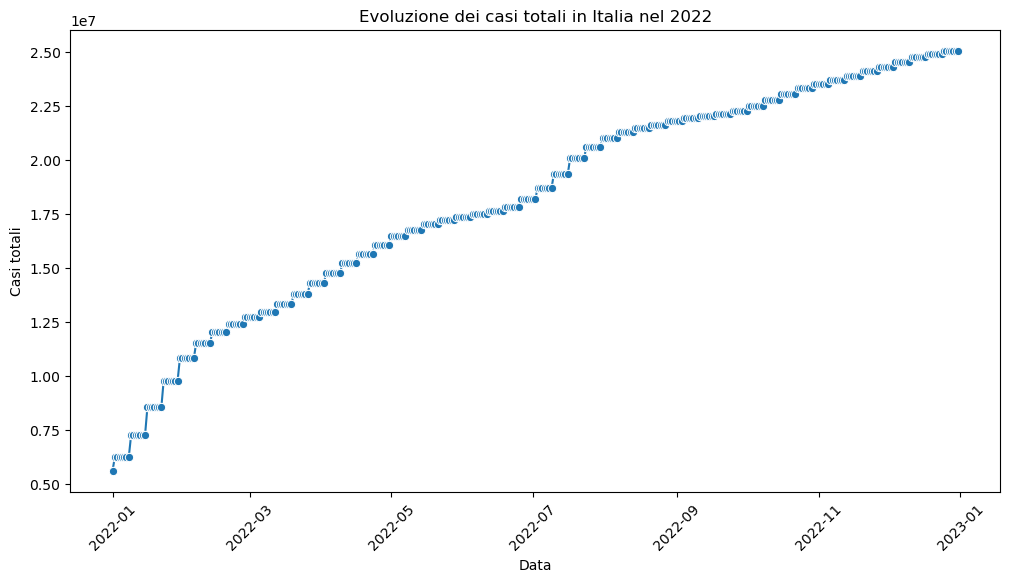

In [45]:
# grafico 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=filtro, x='date', y='total_cases', marker='o')
plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.xticks(rotation=45)
plt.show()

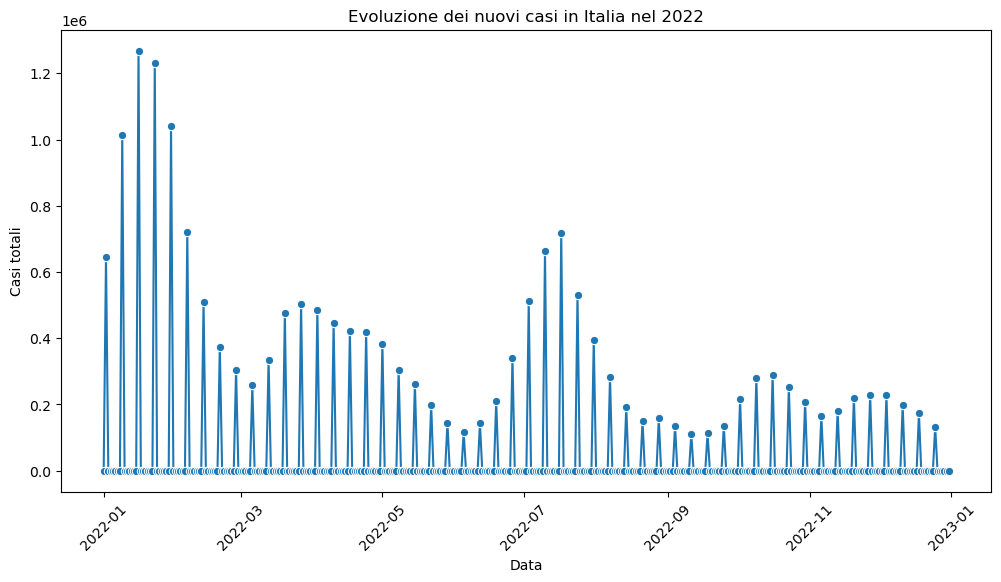

In [46]:
# b. il numero di nuovi casi rispetto alla data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=filtro, x='date', y='new_cases', marker='o')
plt.title("Evoluzione dei nuovi casi in Italia nel 2022")
plt.xlabel("Data")
plt.ylabel("Casi totali")
plt.xticks(rotation=45)
plt.show()

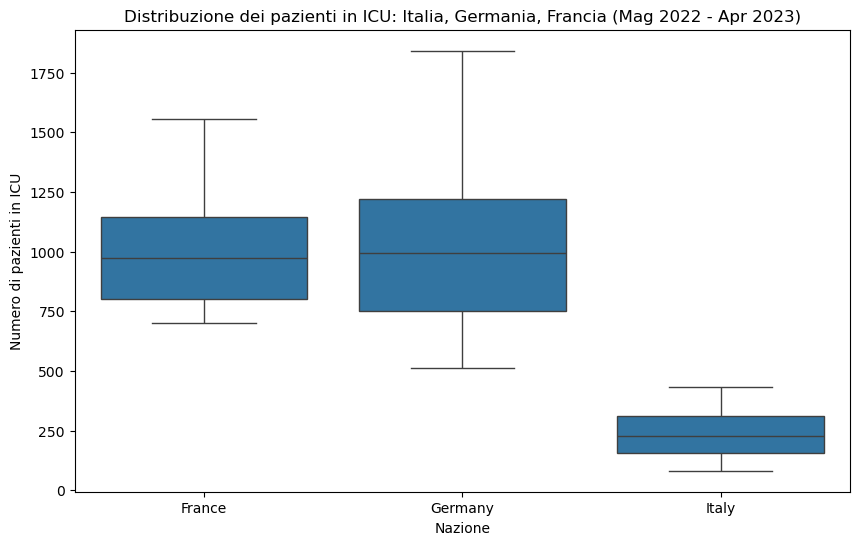

In [47]:
# Riguardo le nazioni di Italia, Germania e Francia
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva 
# (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients) da maggio 2022 (incluso) ad aprile 2023 (incluso)

import seaborn as sns
import matplotlib.pyplot as plt

# consideriamo Italia, Germania e Francia
filtro_icu = df[(df['location'] == 'Italy') |(df['location'] == 'Germany') |(df['location'] == 'France')]

# consideriamo le date: 2022-05-01 e 2023-04-30
start_date = '2022-05-01'
end_date = '2023-04-30'
filtro_icu = filtro_icu[(filtro_icu['date'] >= start_date) & (filtro_icu['date'] <= end_date)]

# eliminare i null di icu_patients
filtro_icu = filtro_icu.dropna(subset=['icu_patients'])

# boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=filtro_icu, x='location', y='icu_patients')
plt.title("Distribuzione dei pazienti in ICU: Italia, Germania, Francia (Mag 2022 - Apr 2023)")
plt.xlabel("Nazione")
plt.ylabel("Numero di pazienti in ICU")
plt.show()


In [ ]:
# b. commentare i risultati

# Possiamo concludere che per Francia e Germania, la mediana del numero di pazienti in ICU è al di sotto dei 1000 pazienti.
# Per la Germania, il primo e il terzo quantile si allontanano di più dalla mediana rispetto alla Francia, indicando quindi una maggiore variabilità
# dei valori centrali. Inoltre i dati presentano una maggiore variabilità (maggiore distanza tra il terzo quantile e il massimo) 
# indicando che ci sono giorni in cui il numero dei pazienti in UCI è molto elevato (picchi)
# Per la Francia, dato il valore mediano, il primo e il terzo quantile sono più vicini alla mediana e vi è una minore variabilità dei dati rispetto alla Germania.

# In italia, il valore mediano dei pazienti in UCI è 250, il boxplot è compresso e vi è poca dispersione sia verso il basso che verso l'alto.
# Il numero dei pazienti in UCI è elevato e variabili in Germania, poi in Francia mentre in Italia la situazione non sembra essere drammatica.

location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


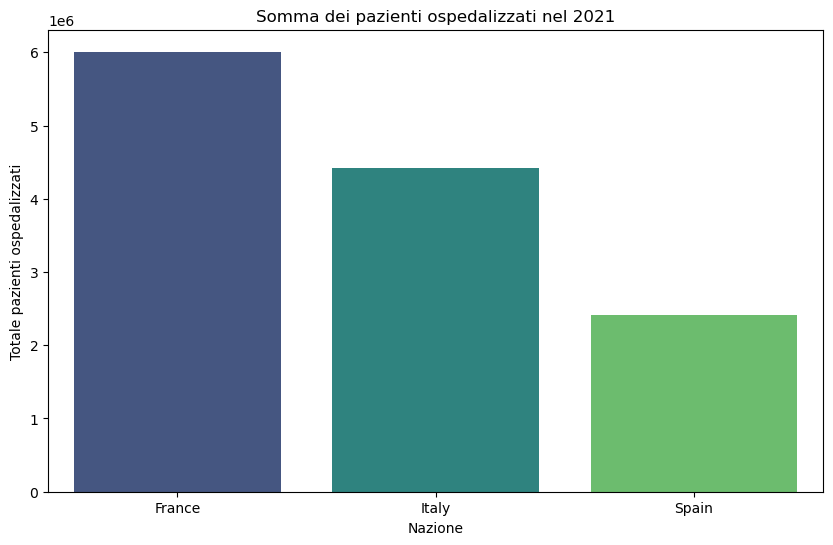

In [48]:
# 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:
# a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients) 

import seaborn as sns
import matplotlib.pyplot as plt

# filtro per i paesi
filtro2021 = df[
    (df['location'] == 'Italy') |
    (df['location'] == 'Germany') |
    (df['location'] == 'France') |
    (df['location'] == 'Spain')
]
# prendiamo solo il 2021
filtro2021 = filtro2021[filtro2021['date'].dt.year == 2021]

# eliminare valori mancanti in hosp_patients
filtro2021 = filtro2021.dropna(subset=['hosp_patients'])

# somma pazienti ospedalizzati per nazione
somma_hosp = filtro2021.groupby('location')['hosp_patients'].sum()
print(somma_hosp)

plt.figure(figsize=(10,6))
sns.barplot(x=somma_hosp.index, y=somma_hosp.values, hue=somma_hosp.index, palette='viridis', dodge=False, legend=False)
plt.title("Somma dei pazienti ospedalizzati nel 2021")
plt.xlabel("Nazione")
plt.ylabel("Totale pazienti ospedalizzati")
plt.show()


# la Germania non appare a causa dei Valori Nulli.

In [49]:
# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

# verifica del valori nulli:
lista = ['Italy', 'Germany', 'France', 'Spain']

# ciclo
for n in lista:
    dati_nazioni = df[df['location'] == n]
    tot = len(dati_nazioni)
    nulli = dati_nazioni['hosp_patients'].isna().sum()
    print(f"{n}: {nulli} valori nulli su {tot} righe ({nulli/tot*100:.2f}%)")

# la Germania presenta il 100% dei valori nulli!

Italy: 50 valori nulli su 1677 righe (2.98%)
Germany: 1674 valori nulli su 1674 righe (100.00%)
France: 565 valori nulli su 1674 righe (33.75%)
Spain: 629 valori nulli su 1674 righe (37.57%)


In [ ]:
# siccome per la Germania ci sono solo valori nulli, a questo punto non ha senso sostituirli perché non sappiamo su cosa basarci per la sostituzione.